In [1]:
#Tutorial from: https://www.datacamp.com/community/tutorials/web-scraping-using-python
#Plus some of my own amendments.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)
type(html)

http.client.HTTPResponse

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
#Get title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [6]:
#Print out text
text = soup.get_text()
#print(text)

In [7]:
all_links = soup.find_all('a')
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/summary/2017GPTR10K
#team
#individual
None
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [8]:
tableRows = soup.find_all('tr')
print(tableRows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr>
<td>Award</td>
<td>Name</td>
<td>Combined Time</td>
<td>1</td><td>2</td><td>3</td><td>4</td></tr>, <tr><td>1ST</td>
<td>DTNA2</td>
<td>02:54:41</td>
<td>00:40:36 - ANDY WEDAM</td><td>00:44:05 - VASILIOS TSIRIMIAGOS</td><td>00:44:48 - ANDRE RAUCH</td><td>00:45:10 - JONATHAN PARSONS</td></tr>, <tr><td>2ND</td>
<td>INTEL TEAM K</td>
<td>03:01:02</td>
<td>00:41:43 - WILLIAM BARRY</td><td>00:42:36 - EDDIE J FRIE</td><td>00:43:46 - SAMANTHA BAGLEY</td><td>00:52:55 - JOHN HAMILTON</td></tr>, <tr><td>3RD</td>
<td>INTEL TEAM F</td>
<td>03:06:06</td>
<td>00:36:42 - NATHAN A SUSTERSIC</td><td>00:39:21 - DEREK G OSBORNE</td><td>00:52:47 - CODY L COVEY</td><td>00:57:16 - VIRAJ P MODAK</td></tr>, <tr><td>4TH</td>
<td>DTNA1</td>
<td>03:15:33</td>
<td>00:40:28 - WITALI SPULING</td><td>00:46:45 - INGA ANDREYEVA</td><td>00:54:09 - KEATON WEISENBORN

In [9]:
'''The goal of this tutorial is to take a table from a webpage and convert
it into a dataframe for easier manipulation using Python. To get there, you
should get all table rows in list form first and then convert that list
into a dataframe. Below is a for loop that iterates through table rows and
prints out the cells of the rows.'''

'The goal of this tutorial is to take a table from a webpage and convert\nit into a dataframe for easier manipulation using Python. To get there, you\nshould get all table rows in list form first and then convert that list\ninto a dataframe. Below is a for loop that iterates through table rows and\nprints out the cells of the rows.'

In [10]:
for row in tableRows:
    rowTD = row.find_all('td')
print(rowTD)
type(rowTD)

[<td>577</td>, <td>443</td>, <td>LIBBY B MITCHELL</td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>163 of 163</td>, <td>F 36-45</td>, <td>56 of 56</td>, <td>0:52</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [11]:
strCells = str(rowTD)
cleanText = BeautifulSoup(strCells, 'lxml').get_text()
print(cleanText)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


In [12]:
#alternatively use regular expressions via 're' and append to a new list.
import re
list_rows = []
for row in tableRows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


str

In [13]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,"[Award, Name, Combined Time, 1, 2, 3, 4]"
5,"[1ST, DTNA2, 02:54:41, 00:40:36 - ANDY WEDAM, ..."
6,"[2ND, INTEL TEAM K, 03:01:02, 00:41:43 - WILLI..."
7,"[3RD, INTEL TEAM F, 03:06:06, 00:36:42 - NATHA..."
8,"[4TH, DTNA1, 03:15:33, 00:40:28 - WITALI SPULI..."
9,"[5TH, FXG1, 03:21:16, 00:42:56 - DAVID HERRON,..."


In [14]:
dfSplit = df[0].str.split(',', expand=True)
dfSplit.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,[1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,[2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,[3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,[4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,[5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


In [15]:
dfSplit[0] = dfSplit[0].str.strip('[')
dfSplit[0] = dfSplit[0].str.strip(']')
dfSplit[1] = dfSplit[1].str.strip(']')
dfSplit[6] = dfSplit[6].str.strip(']')
dfSplit.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4,None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS,None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON,None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK,None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN,None,None,None,None,None,None,None
9,5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM,None,None,None,None,None,None,None


In [16]:
col_labels = soup.find_all('th')

In [17]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, 'lxml').get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [18]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [19]:
df3 = df2[0].str.split(',', expand=True)
df3[0] = df3[0].str.strip('[')
df3[13] = df3[13].str.strip(']')
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team


In [20]:
frames = [df3, dfSplit]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4,None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS,None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON,None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK,None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN,None,None,None,None,None,None,None


In [21]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None


In [22]:
'''
At this point, the table is almost properly formatted. For analysis, you can
start by getting an overview of the data as shown below.
'''

'\nAt this point, the table is almost properly formatted. For analysis, you can\nstart by getting an overview of the data as shown below.\n'

In [23]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Place             598 non-null    object
 1    Bib              596 non-null    object
 2    Name             593 non-null    object
 3    Gender           593 non-null    object
 4    City             593 non-null    object
 5    State            593 non-null    object
 6    Chip Time        593 non-null    object
 7    Chip Pace        578 non-null    object
 8    Gender Place     578 non-null    object
 9    Age Group        578 non-null    object
 10   Age Group Place  578 non-null    object
 11   Time to Start    578 non-null    object
 12   Gun Time         578 non-null    object
 13   Team             578 non-null    object
dtypes: object(14)
memory usage: 37.4+ KB


(598, 14)

In [24]:
df6 = df5.dropna(axis=0, how='any')

In [25]:
df7 = df6.drop(df6.index[0])
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [26]:
df7.rename(columns={' Bib':'BibNum'}, inplace=True)
df7.head()

,Place,BibNum,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


In [47]:
time_list = df7[' Chip Time'].tolist()
time_mins = []
for i in time_list:
    listSplit = i.split(':')
    m, s = int(listSplit[-2]), int(listSplit[-1])
    h = 0
    if(len(listSplit) == 3):
        h = int(listSplit[-3])
    math = (h * 3600 + m * 60 + s)/60
    time_mins.append(math)
df7['Runner_mins'] = time_mins
df7.head()

,Place,BibNum,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,],36.350000
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...,36.700000
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,],37.733333
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,],38.566667
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...,39.350000


In [48]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x14eb838>], [Text(0, 0, 'Runners')])

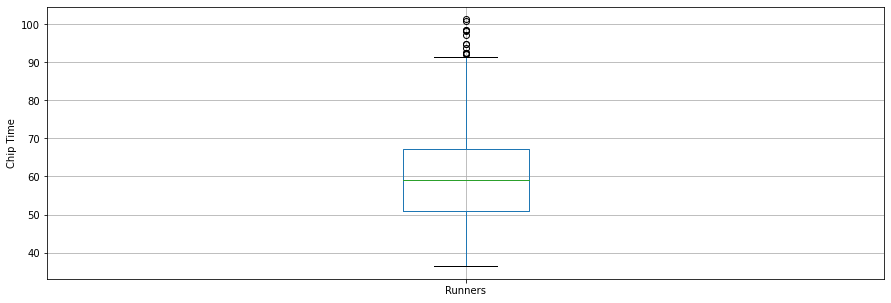

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

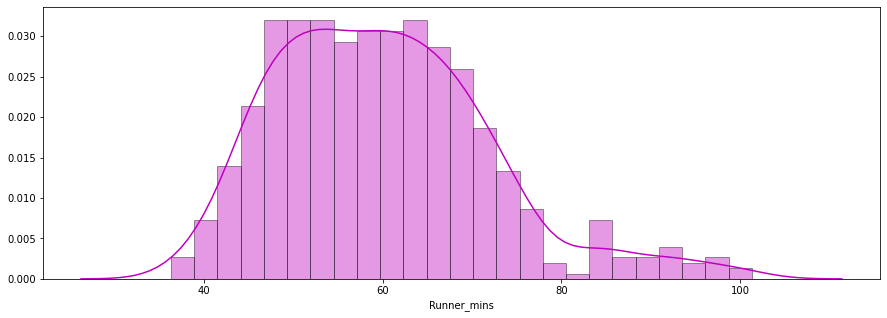

In [52]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

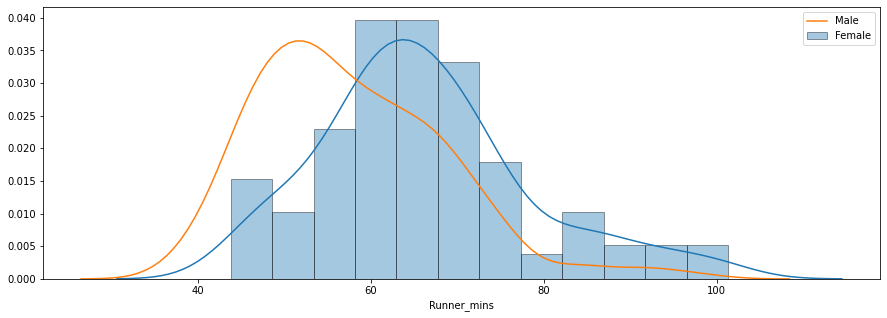

In [53]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [54]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

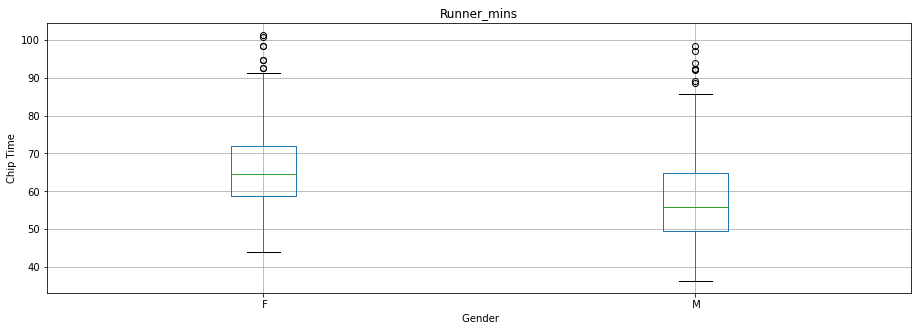

In [55]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")